# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps

# gmaps API Keys
from config import (api_key)
#from config import (gkey)

# api_key = "94fe79ca10aeb1a16010a64e88e6ad028d22bbac"
# gkey = "whatever your Google API key is"
# And make sure gmaps is installed:
# pip install gmaps

In [2]:
# pip install citipy
from citipy import citipy

In [3]:
city = citipy.nearest_city(22.99, 120.21)
city

print ({city.city_name})
print ({city.country_code}) 

{'tainan'}
{'tw'}


## Generate Cities List

In [4]:
cities_list = []
latitude_longitude_pairs = []
np.random.seed(250)  # to allow others to duplicate 
lats = np.random.randint(-90.00, 90.00, size=2500)
longs = np.random.randint(-180.00, 180.00, size=2500)
latitude_longitude_pairs = zip(lats, longs) 

city_table_df = pd.DataFrame(columns = ['Latitude', 'Longitude', 'City'])
for latitude_longitude_pair in latitude_longitude_pairs:
    returned_city = citipy.nearest_city(latitude_longitude_pair[0],latitude_longitude_pair[1]).city_name
    
    if returned_city not in cities_list:
       cities_list.append(returned_city) 
       city_table_df = city_table_df.append({'Latitude' : latitude_longitude_pair[0], 'Longitude' : latitude_longitude_pair[1], 'City' : returned_city}, ignore_index = True)  
        
#len(list_of_cities)  
#print(list_of_cities)
city_table_df.head(20)

,Latitude,Longitude,City
0,20,-24,ponta do sol
1,-13,15,longonjo
2,-65,133,new norfolk
3,-32,-8,jamestown
4,-39,-139,rikitea
5,66,-12,hofn
6,-61,24,bredasdorp
7,-1,67,hithadhoo
8,65,121,vilyuysk
9,75,-1,klaksvik


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
# api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=d4c873abc92c744d00b2de5e85620ad6

In [11]:
#cities = ['chicago', 'minneapolis', 'cedar rapids']

# set up lists to hold reponse info
lat = []
long = []
temp = []
humid = []
wind = []
speed = []
cloud = []
cities2 = []

# Loop through the list of cities and perform a request for data on each
for city in cities_list:
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        cities2.append(response['name'])
    except:
        pass

print('this message')     
#print(f"The latitude information received is: {lat}")

this message


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_datasofar = {"city": cities2,
                     "latitude": lat,
                     "longitude": long,
                     "temperature": temp,
                     "humidity": humid,
                     "wind speed": wind,
                     "cloudiness": cloud}
weather_guide = pd.DataFrame(weather_datasofar)
weather_guide 

,city,latitude,longitude,temperature,humidity,wind speed,cloudiness
0,Ponta do Sol,32.6667,-17.1000,55.26,80,1.99,100
1,Longonjo,-12.9067,15.2533,65.75,68,1.36,76
2,New Norfolk,-42.7826,147.0587,46.40,85,4.00,92
3,Jamestown,42.0970,-79.2353,70.56,43,9.22,1
4,Rikitea,-23.1203,-134.9692,77.13,73,11.23,29
...,...,...,...,...,...,...,...
833,Amherst,41.3978,-82.2224,81.66,24,21.85,1
834,Waterloo,43.4668,-80.5164,61.21,51,10.36,75
835,Belmonte,-15.8631,-38.8828,78.80,65,12.66,0
836,Hohhot,40.8106,111.6522,30.20,74,4.47,0


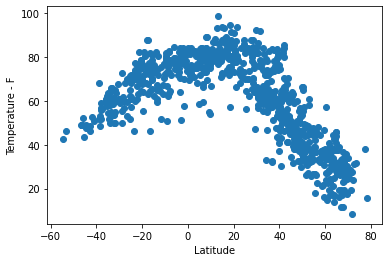

In [16]:
x_values = weather_guide['latitude']
y_values = weather_guide['temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature - F')
plt.show()

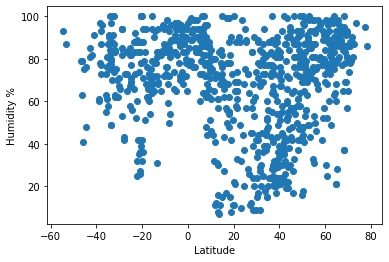

In [17]:
x_values = weather_guide['latitude']
y_values = weather_guide['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression